In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
# import pandas_profiling

In [3]:
df = pd.read_table('Airfares.txt', delim_whitespace=True,header=None,names=('City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','market share','price'))

C:\Users\P S V\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\P S V\Anaconda3\lib\site-packages\pandas\io\parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share.1               1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [55]:
df.shape

(1000, 11)

We totally have 1000 rows and 11 columns

# Descriptive Statistics

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market share.1,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


# Checking for Null Values

In [57]:
df.isnull().sum()


City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share                 0
Average fare                 0
Low price airline            0
market share.1               0
price                        0
dtype: int64

## Exploratory Data Analysis

In [58]:
##Top five cities

df.City1.value_counts()[0:5]

ATL    64
ORD    63
DFW    52
BWI    47
BOS    38
Name: City1, dtype: int64

In [59]:
##Top five cities

df.City2.value_counts()[0:5]

TPA    46
MCO    43
LGA    42
SEA    42
IAD    40
Name: City2, dtype: int64

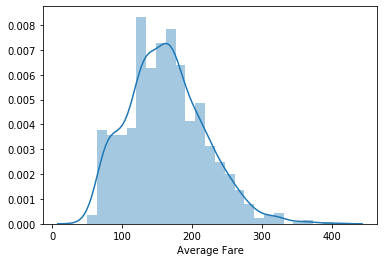

In [60]:
sns.distplot( df['Average Fare']);

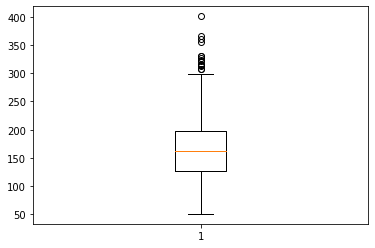

In [61]:
box = plt.boxplot(df['Average Fare']);

In [62]:
[item.get_ydata()[0] for item in box['caps']]

[50.52, 299.31]

In [63]:
[item.get_ydata()[0] for item in box['whiskers']]

[125.975, 197.39249999999998]

In [64]:
[item.get_ydata()[0] for item in box['medians']]

[161.34500000000003]

In [65]:
## Cities with average Fare above Maximum (Q3+1.5IQR)

df.loc[df['Average Fare'] > 299.31,['City1','City2']]

,City1,City2
197,BOS,LAX
212,BOS,SAN
213,BOS,SFO
328,CVG,LAX
607,IAH,SFO
709,LAX,MIA
714,LAX,LGA
737,LAX,IAD
760,MIA,SFO
836,LGA,SAN


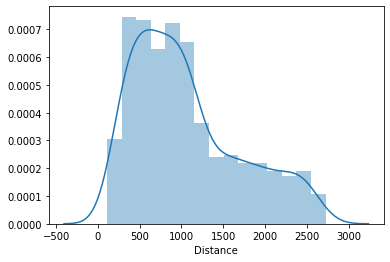

In [66]:
sns.distplot( df['Distance']);

  > Most of the distances lie between 500-1000

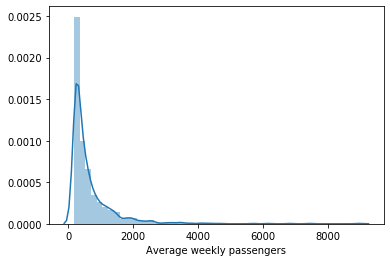

In [67]:
sns.distplot( df['Average weekly passengers']);

In [68]:
df['market leading airline'].value_counts()

WN    257
DL    162
AA    135
UA     91
NW     86
CO     69
US     68
AS     32
HP     30
YX     16
FL     16
B6     14
NK     10
TZ     10
F9      3
G4      1
Name: market leading airline, dtype: int64

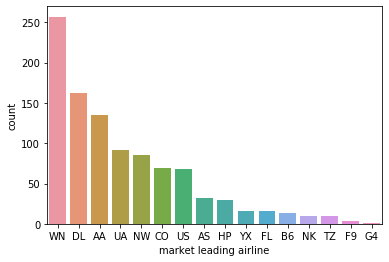

In [69]:
sns.countplot(x="market leading airline",data=df,order = df['market leading airline'].value_counts().index)

## Inference :
    The top three Airlines are WN,DL and AA

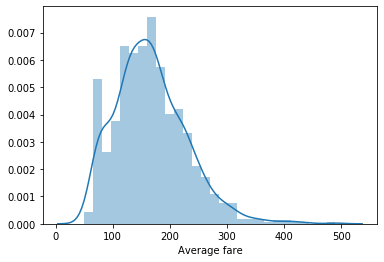

In [70]:
sns.distplot( df['Average fare']);

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share.1               1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [72]:
df['Low price airline'].value_counts()

WN    230
DL    151
AA    129
US    101
FL     60
HP     58
UA     55
CO     45
TZ     34
NW     33
F9     30
AS     27
NK     16
B6     15
SY      7
YX      3
AX      3
AQ      2
G4      1
Name: Low price airline, dtype: int64

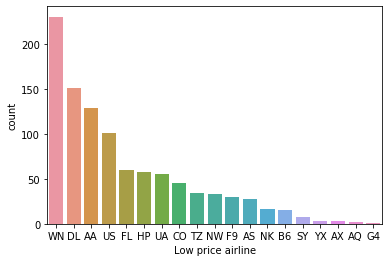

In [73]:
sns.countplot(x="Low price airline",data=df,order = df['Low price airline'].value_counts().index)

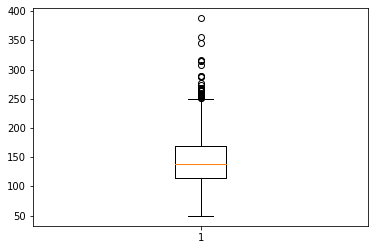

In [74]:
box = plt.boxplot(df['price']);

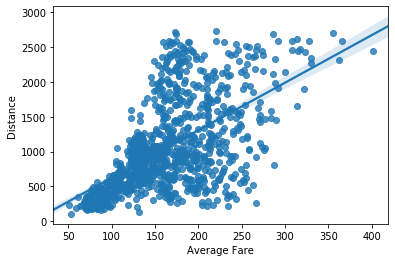

In [75]:
sns.regplot( x = 'Average Fare',
y = 'Distance',
data =df );

In [76]:
numeric = df.select_dtypes(include=['float64', 'int64'])

In [77]:
numeric[0:10]

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42
5,135.17,1204,199.02,40.68,137.97,17.09,127.69
6,152.85,2237,237.17,59.94,148.59,59.94,148.59
7,190.73,2467,191.95,17.89,205.06,16.59,174.00
8,129.35,1073,550.54,76.84,127.69,76.84,127.69
9,134.17,1130,202.93,35.40,132.91,26.40,124.78


In [78]:
categorical = df.select_dtypes(include=['object'])

In [79]:
categorical[0:5]

,City1,City2,market leading airline,Low price airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN


In [80]:
# correlation matrix
cor = numeric.corr()
cor

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
Average Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market share.1,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


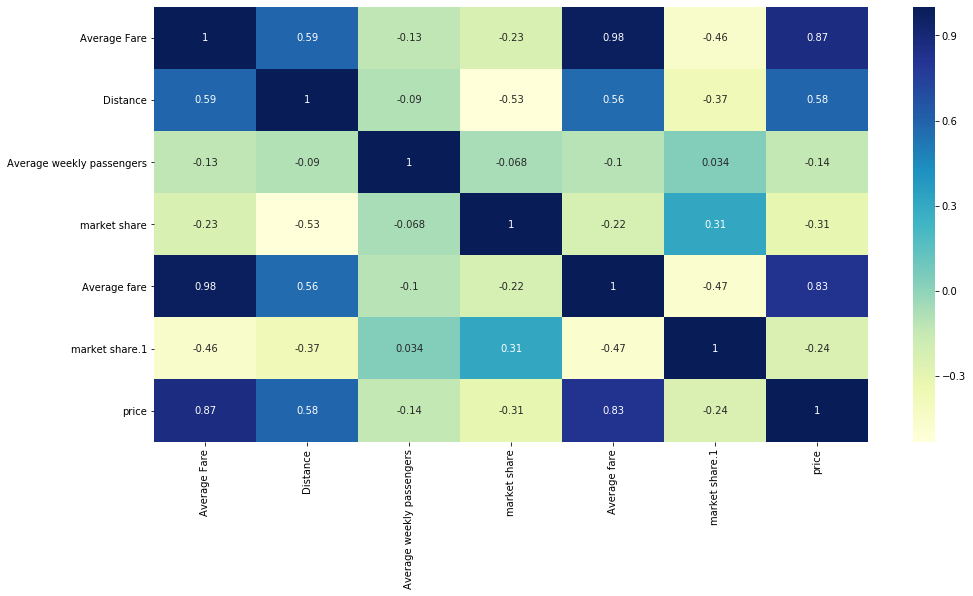

In [81]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

 >> From the above we can infer that Average fare has a good correlation with Distance

C:\Users\GURURAJAN\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


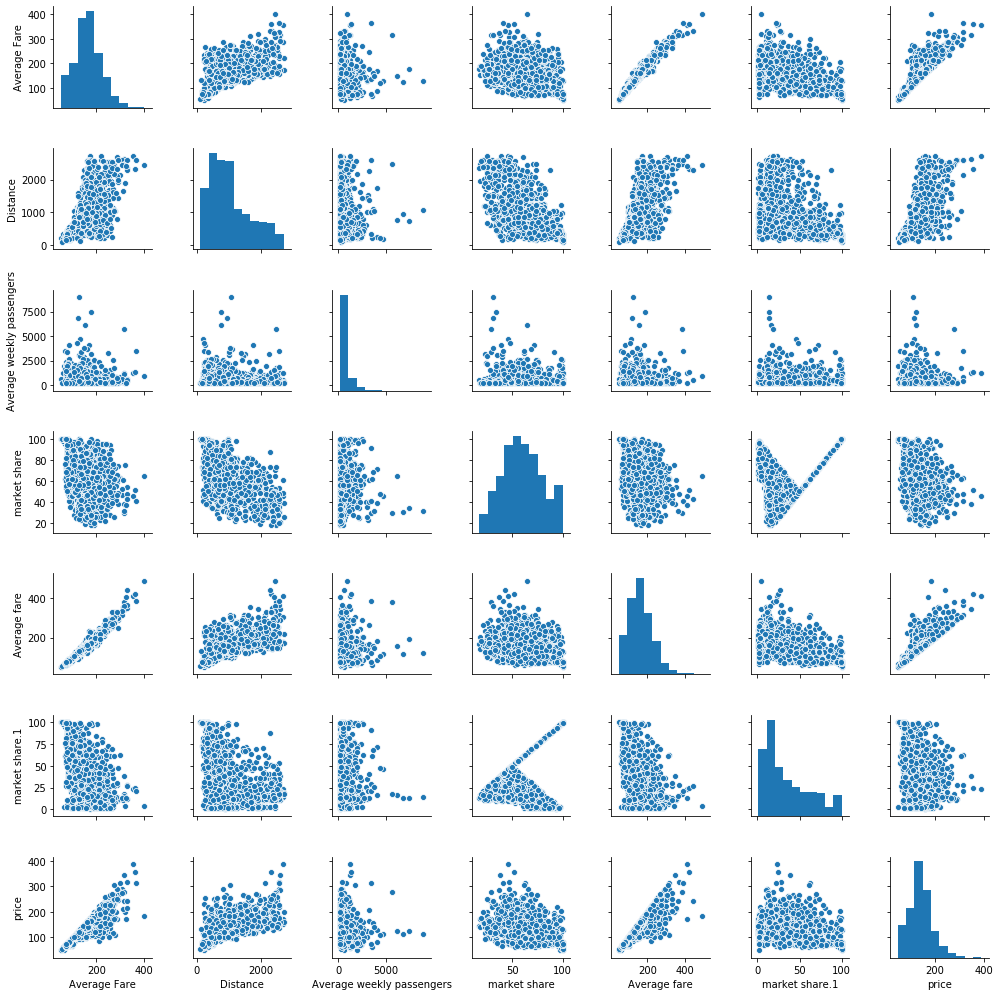

In [82]:
sns.pairplot(numeric, size=2)

# Checking the assumptions

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
City1                        1000 non-null object
City2                        1000 non-null object
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market leading airline       1000 non-null object
market share                 1000 non-null float64
Average fare                 1000 non-null float64
Low price airline            1000 non-null object
market share.1               1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


# Handling the object Variable

In [84]:
df_categorical=df[['City1','City2','market leading airline','Low price airline']]

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,City1,City2,market leading airline,Low price airline
0,16,0,6,8
1,16,40,6,6
2,2,0,4,5
3,2,7,14,17
4,2,52,12,17


In [86]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price,City1,City2,market leading airline,Low price airline
0,114.47,528,424.56,70.19,111.03,70.19,111.03,16,0,6,8
1,122.47,860,276.84,75.10,123.09,17.23,118.94,16,40,6,6
2,214.42,852,215.76,78.89,223.98,2.77,167.12,2,0,4,5
3,69.40,288,606.84,96.97,68.86,96.97,68.86,2,7,14,17
4,158.13,723,313.04,39.79,161.36,15.34,145.42,2,52,12,17


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market share                 1000 non-null float64
Average fare                 1000 non-null float64
market share.1               1000 non-null float64
price                        1000 non-null float64
City1                        1000 non-null int32
City2                        1000 non-null int32
market leading airline       1000 non-null int32
Low price airline            1000 non-null int32
dtypes: float64(6), int32(4), int64(1)
memory usage: 70.4 KB


# Define X and y variables

In [88]:
X =df.drop('Average Fare',axis=1)
y=df['Average Fare']

In [89]:
#Creating train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [90]:
import statsmodels.api as sm 
lm = sm.OLS(y_train, X_train).fit()

In [91]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:           Average Fare   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.584e+04
Date:                Mon, 14 Oct 2019   Prob (F-statistic):                        0.00
Time:                        12:50:45   Log-Likelihood:                         -2526.9
No. Observations:                 700   AIC:                                      5074.
Df Residuals:                     690   BIC:                                      5119.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

## Inference

   >Auto corrrelation - Is present as Durbin-Watson is 1.75  no serial correlation
   Explanantion : When the test statistic equals 2 indicates no serial correlation. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation
    >>Jarque-Bera (JB):  Value is considerably low so it is normaly distributed 
     >>>No warnings related to Multicollinearity

# Check for  linearity- Rainbow Test
The Null hypothesis is that the regression is correctly modelled as linear. The alternative for which the power might be large are convex

In [92]:
sm.stats.diagnostic.linear_rainbow(lm, frac=0.5)

(1.038877274156965, 0.3619102487837604)

We reject Null Hypothesis
>Linearity test is failed

# Test for Multicollinearity 

In [93]:
# VIF - Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(X.values, col) 
                   for col in range(0, X.shape[1])]

In [94]:
ce = ['City1', 'City2', 'market leading airline', 'Low price airline',
       'Distance', 'Average weekly passengers', 'market share', 'Average fare',
       'market share.1', 'price']
vif["Feature Names"] = ce

In [95]:
vif

,VIF Values,Feature Names
0,7.409693,City1
1,1.713743,City2
2,10.506674,market leading airline
3,38.405571,Low price airline
4,4.393042,Distance
5,40.379261,Average weekly passengers
6,3.645095,market share
7,6.487487,Average fare
8,3.650960,market share.1
9,4.253537,price


>Multicollinearity is present 
As the P- value of Average weekly passengers is greater than 0.05 and the VIF value is 40.37 we can drop the column

# Test of Heteroscedasticity - Goldfend Quandt test

1. Null Hypothesis - The Data is HOMOSCEDASTIC (Uniform Variance)
2. Alternate Hypothesis - Data is HETEROSCEDASTIC( Unequal Variance)

In [96]:
from statsmodels.stats.api import linear_rainbow, het_goldfeldquandt
het_goldfeldquandt(y, X)

(1.0705592256666911, 0.2253738232667984, 'increasing')

The Data is HOMOSCEDASTIC

# Standardization  with z score

In [97]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market share                 1000 non-null float64
Average fare                 1000 non-null float64
market share.1               1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


In [98]:
from scipy.stats import zscore

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Average Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average weekly passengers    1000 non-null float64
market share                 1000 non-null float64
Average fare                 1000 non-null float64
market share.1               1000 non-null float64
price                        1000 non-null float64
City1                        1000 non-null int32
City2                        1000 non-null int32
market leading airline       1000 non-null int32
Low price airline            1000 non-null int32
dtypes: float64(6), int32(4), int64(1)
memory usage: 70.4 KB


In [100]:
numeric.drop(['Average Fare','Average weekly passengers'],axis=1,inplace=True)

In [101]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
Distance          1000 non-null int64
market share      1000 non-null float64
Average fare      1000 non-null float64
market share.1    1000 non-null float64
price             1000 non-null float64
dtypes: float64(4), int64(1)
memory usage: 39.1 KB


In [102]:
numeric=numeric.apply(zscore)

In [103]:
numeric.head()

,Distance,market share,Average fare,market share.1,price
0,-0.822816,0.519752,-0.888051,1.315878,-0.681341
1,-0.306391,0.773393,-0.695488,-0.639560,-0.513776
2,-0.318835,0.969177,0.915432,-1.173465,0.506866
3,-1.196135,1.903153,-1.561383,2.304674,-1.574668
4,-0.519494,-1.050651,-0.084427,-0.709344,0.047175


In [104]:
df = df.drop(['Distance','Average weekly passengers','market share','Average fare','market share.1','price'], axis=1)

In [105]:
df.head()

,Average Fare,City1,City2,market leading airline,Low price airline
0,114.47,16,0,6,8
1,122.47,16,40,6,6
2,214.42,2,0,4,5
3,69.40,2,7,14,17
4,158.13,2,52,12,17


In [106]:
#concat numeric with original df
df = pd.concat([df,numeric], axis=1)

In [107]:
df.head()

,Average Fare,City1,City2,market leading airline,Low price airline,Distance,market share,Average fare,market share.1,price
0,114.47,16,0,6,8,-0.822816,0.519752,-0.888051,1.315878,-0.681341
1,122.47,16,40,6,6,-0.306391,0.773393,-0.695488,-0.639560,-0.513776
2,214.42,2,0,4,5,-0.318835,0.969177,0.915432,-1.173465,0.506866
3,69.40,2,7,14,17,-1.196135,1.903153,-1.561383,2.304674,-1.574668
4,158.13,2,52,12,17,-0.519494,-1.050651,-0.084427,-0.709344,0.047175


In [108]:
df.shape

(1000, 10)

# Building the Linear regression model

In [109]:
X =df.drop('Average Fare',axis=1)
y=df['Average Fare']

In [110]:
#Creating train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [111]:
lm = LinearRegression() # created the machine learning algo

In [112]:
# use the lm to train my dataset
lm.fit(X_train, y_train) # Model is fitted on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))



0.9757773730636001


In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

6.242952929484397
8.733923283788839


# Building an OLS

In [115]:
# Adding a Constant - Purpose | Helps in Calculation of Intercept
X = sm.add_constant(X)
# Building the Model
ins_model = sm.OLS(y,X).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(X) # Making Prediction on X values

C:\Users\GURURAJAN\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [116]:
# R Square Values
print(ins_model.rsquared)
print(ins_model.rsquared_adj)

0.9749116946944095
0.9746836191916314


In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y, ins_pred))
print(np.sqrt(mean_squared_error(y, ins_pred)))

6.228433125900148
8.765110595448302


# Objective - Enhance the prediction power of the model

# Polynomial 

In [118]:
from sklearn.preprocessing import PolynomialFeatures

In [119]:
pf = PolynomialFeatures()

In [120]:
# Transformed the Input Variabes for a better modelling
X = pf.fit_transform(X)

In [121]:
# Building the Model
ins_model = sm.OLS(y,X).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(X) # Making Prediction on X values 
st_residual = ins_model.get_influence().resid_studentized_internal

In [122]:
# Find the Rsquare
print(ins_model.rsquared)
print(ins_model.rsquared_adj)

0.9887412538159424
0.988097896891139


In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y, ins_pred))
print(np.sqrt(mean_squared_error(y, ins_pred)))

3.8537959248222857
5.871739116841181


#  Random Forest and  Bagging - Ensemble

In [124]:

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [125]:

rf = RandomForestRegressor()
bag = BaggingRegressor()

# Random Forest

In [128]:
# Random Forest
rf.fit(X,y)
pred_rf = rf.predict(X)
print(mean_absolute_error(y, pred_rf))
print(np.sqrt(mean_squared_error(y, pred_rf)))

2.1304750000000006
3.4128579084104866


# Bagging

In [129]:
# Bagging
bag.fit(X,y)
pred_bag = bag.predict(X)
print(mean_absolute_error(y, pred_bag))
print(np.sqrt(mean_squared_error(y, pred_bag)))

2.094168000000001
3.407420518515437


# Inference



The best model in terms of Mean Absolute error is as follows: Bagging-->Random forest-->Polynomial--->Linear

The most important feature for predicting Average Fare is Distance, Price which can be infered from the Pair Plot